In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Load the dataset
try:
    data = pd.read_csv('score_updated.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(data.head())
except FileNotFoundError:
    print("Error: 'score_updated.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Prepare the data
# X contains the feature (Hours studied)
# y contains the target variable (Scores)
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Split data for both models (using the same split for a fair comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dataset loaded successfully.
First 5 rows of the dataset:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30



--- Basic Linear Regression Model ---

Cross-Validation (Basic Model):
RMSE scores for each fold: [2.62899203 5.01959972 2.26486676 1.79905626 3.63449951]
Average CV RMSE: 3.07 (+/- 1.15)

Basic model trained on the full training set.

Basic Model Evaluation:

Test Set Performance:
Mean Absolute Error (MAE): 3.37
Mean Squared Error (MSE): 17.01
Root Mean Squared Error (RMSE): 4.12
R-squared: 0.97

Training Set Performance:
R-squared: 0.98


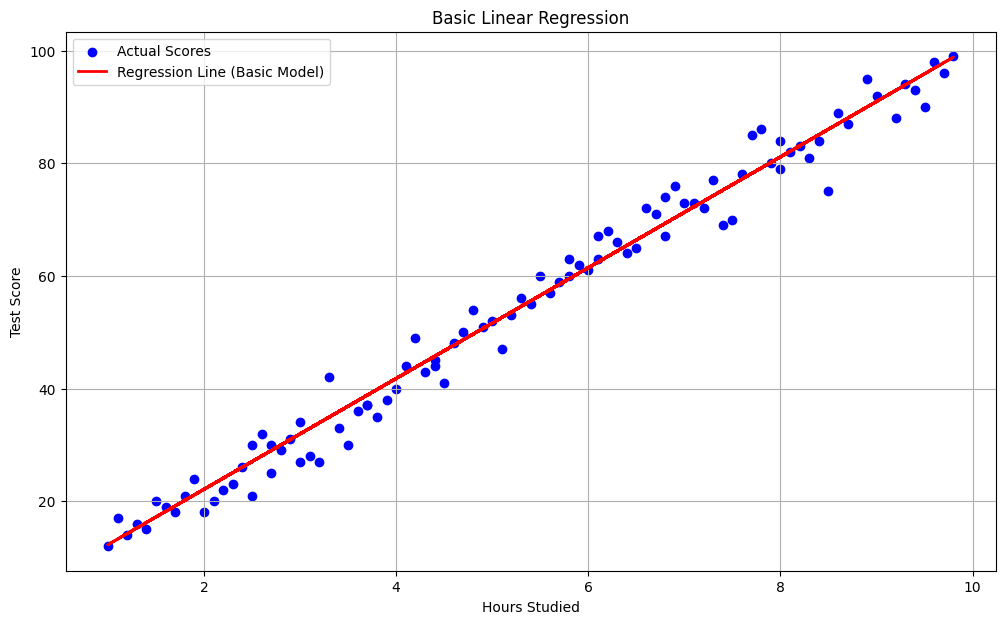

In [ ]:
print("\n--- Basic Linear Regression Model ---")

# Create and train the basic linear regression model
basic_model = LinearRegression()

# --- Validation for Basic Model: K-Fold Cross-Validation ---
# Use 5-fold cross-validation to get a more robust performance estimate
cv_scores = cross_val_score(basic_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("\nCross-Validation (Basic Model):")
print(f"RMSE scores for each fold: {cv_rmse_scores}")
print(f"Average CV RMSE: {cv_rmse_scores.mean():.2f} (+/- {cv_rmse_scores.std():.2f})")

# Now, train the model on the full training data
basic_model.fit(X_train, y_train)
print("\nBasic model trained on the full training set.")

# Make predictions on the test data
y_pred_basic_test = basic_model.predict(X_test)
y_pred_basic_train = basic_model.predict(X_train)

# --- Performance Evaluation for Basic Model ---
print("\nBasic Model Evaluation:")
# Test set performance
mae_basic = metrics.mean_absolute_error(y_test, y_pred_basic_test)
mse_basic = metrics.mean_squared_error(y_test, y_pred_basic_test)
rmse_basic = np.sqrt(mse_basic)
r2_basic_test = metrics.r2_score(y_test, y_pred_basic_test)
print("\nTest Set Performance:")
print(f'Mean Absolute Error (MAE): {mae_basic:.2f}')
print(f'Mean Squared Error (MSE): {mse_basic:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_basic:.2f}')
print(f'R-squared: {r2_basic_test:.2f}')

# Training set performance (to check for overfitting)
r2_basic_train = metrics.r2_score(y_train, y_pred_basic_train)
print("\nTraining Set Performance:")
print(f'R-squared: {r2_basic_train:.2f}')


# Plotting the Results for Basic Model
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, basic_model.predict(X), color='red', linewidth=2, label='Regression Line (Basic Model)')
plt.title('Basic Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.legend()
plt.grid(True)
plt.show()


--- Fine-Tuned Regression Model ---
Using Pipeline, PolynomialFeatures, StandardScaler, Ridge Regression, and GridSearchCV.

Best parameters found by GridSearchCV: {'poly_features__degree': 4, 'regressor__alpha': 0.1}
Fine-tuned model trained.

Fine-Tuned Model Evaluation:

Best Cross-Validation RMSE during tuning: 3.23

Test Set Performance:
Mean Absolute Error (MAE): 3.30
Mean Squared Error (MSE): 15.54
Root Mean Squared Error (RMSE): 3.94
R-squared: 0.97

Training Set Performance:
R-squared: 0.99


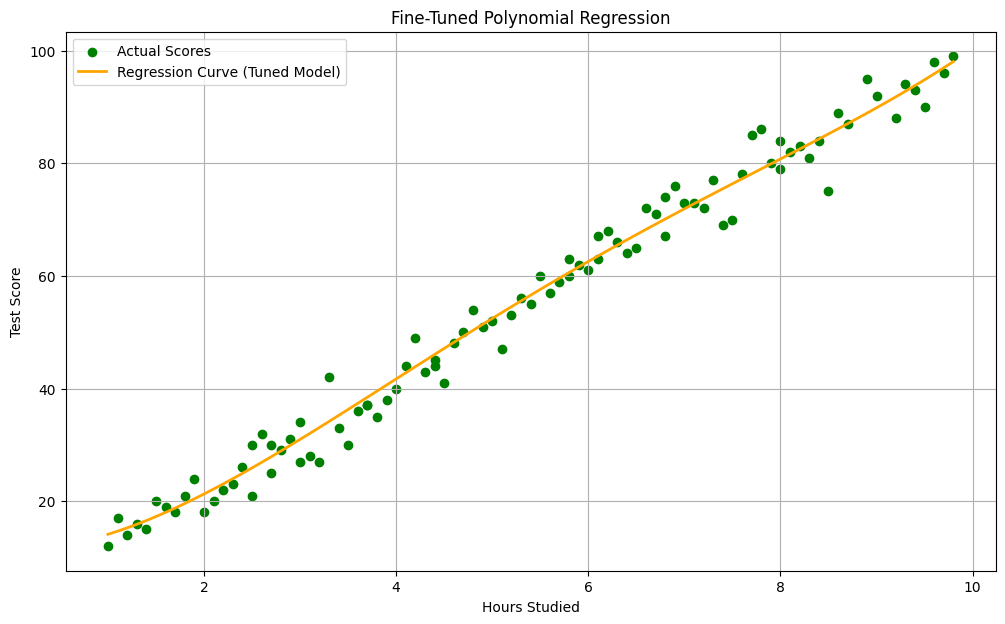

In [ ]:
print("\n--- Fine-Tuned Regression Model ---")
print("Using Pipeline, PolynomialFeatures, StandardScaler, Ridge Regression, and GridSearchCV.")

# Create a pipeline to chain the steps: scaling, polynomial features, and regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('regressor', Ridge())
])

# Define the parameter grid for GridSearchCV to search over
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# --- Validation for Tuned Model: GridSearchCV ---
# GridSearchCV inherently performs cross-validation to find the best parameters.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# The best model found by the grid search
tuned_model = grid_search.best_estimator_
print(f"\nBest parameters found by GridSearchCV: {grid_search.best_params_}")
print("Fine-tuned model trained.")

# Make predictions with the fine-tuned model
y_pred_tuned_test = tuned_model.predict(X_test)
y_pred_tuned_train = tuned_model.predict(X_train)

# --- Performance Evaluation for Fine-Tuned Model ---
print("\nFine-Tuned Model Evaluation:")
# Best cross-validation score from the grid search
best_cv_score = np.sqrt(-grid_search.best_score_)
print(f"\nBest Cross-Validation RMSE during tuning: {best_cv_score:.2f}")

# Test set performance
mae_tuned = metrics.mean_absolute_error(y_test, y_pred_tuned_test)
mse_tuned = metrics.mean_squared_error(y_test, y_pred_tuned_test)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned_test = metrics.r2_score(y_test, y_pred_tuned_test)
print("\nTest Set Performance:")
print(f'Mean Absolute Error (MAE): {mae_tuned:.2f}')
print(f'Mean Squared Error (MSE): {mse_tuned:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_tuned:.2f}')
print(f'R-squared: {r2_tuned_test:.2f}')

# Training set performance (to check for overfitting)
r2_tuned_train = metrics.r2_score(y_train, y_pred_tuned_train)
print("\nTraining Set Performance:")
print(f'R-squared: {r2_tuned_train:.2f}')


# Plotting the Results for the Fine-Tuned Model
plt.figure(figsize=(12, 7))
# To plot the curve, we need to generate predictions for a smooth range of X values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = tuned_model.predict(X_range)

plt.scatter(X, y, color='green', label='Actual Scores')
plt.plot(X_range, y_range_pred, color='orange', linewidth=2, label='Regression Curve (Tuned Model)')
plt.title('Fine-Tuned Polynomial Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.legend()
plt.grid(True)
plt.show()



--- Performance Metrics Summary ---
Test Set Performance Comparison:
   Metric Basic Model Tuned Model
      MAE        3.37        3.30
      MSE       17.01       15.54
     RMSE        4.12        3.94
R-squared        0.97        0.97


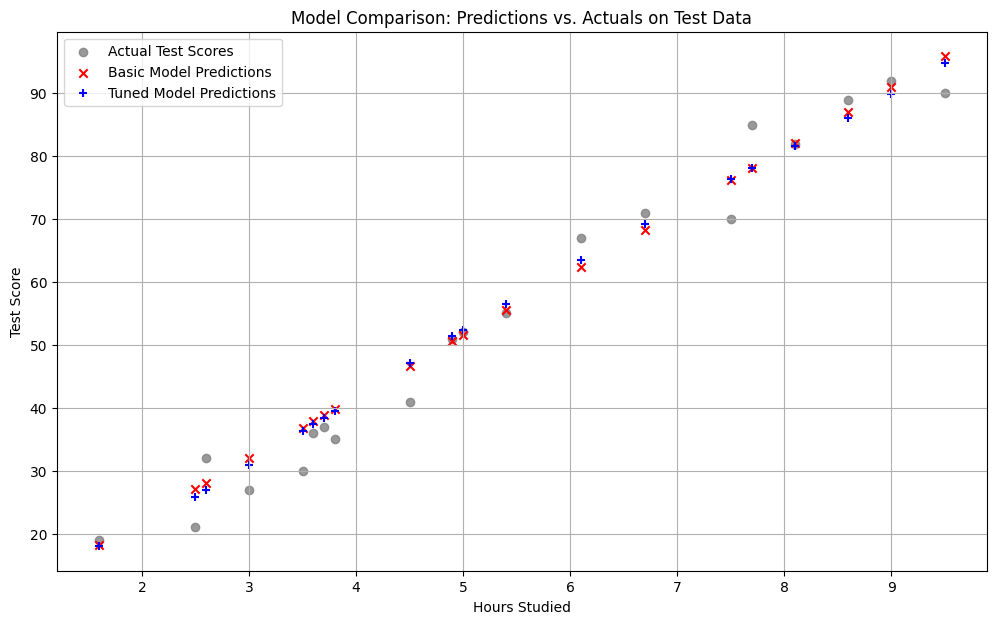

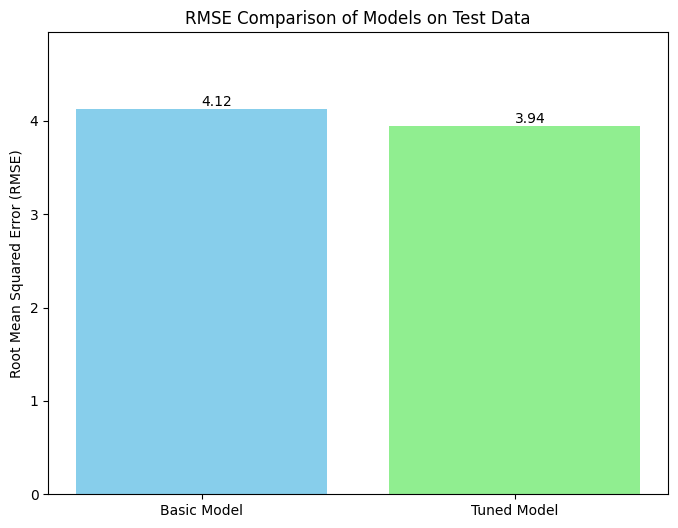

In [ ]:
# --- Performance Metrics Summary ---
print("\n--- Performance Metrics Summary ---")

# Create a dictionary to hold the metrics for the test set
comparison_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Basic Model': [f"{mae_basic:.2f}", f"{mse_basic:.2f}", f"{rmse_basic:.2f}", f"{r2_basic_test:.2f}"],
    'Tuned Model': [f"{mae_tuned:.2f}", f"{mse_tuned:.2f}", f"{rmse_tuned:.2f}", f"{r2_tuned_test:.2f}"]
}

# Create and print a pandas DataFrame for easy comparison
comparison_df = pd.DataFrame(comparison_data)
print("Test Set Performance Comparison:")
print(comparison_df.to_string(index=False))

# --- Visual Comparison ---

# Plot 1: Both regression lines on one graph
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='gray', alpha=0.8, label='Actual Test Scores')
# Plot basic model predictions
plt.scatter(X_test, y_pred_basic_test, color='red', marker='x', label='Basic Model Predictions')
# Plot tuned model predictions
plt.scatter(X_test, y_pred_tuned_test, color='blue', marker='+', label='Tuned Model Predictions')
plt.title('Model Comparison: Predictions vs. Actuals on Test Data')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.legend()
plt.grid(True)
plt.show()


# Plot 2: Bar chart for RMSE comparison
plt.figure(figsize=(8, 6))
models = ['Basic Model', 'Tuned Model']
rmse_values = [rmse_basic, rmse_tuned]
bars = plt.bar(models, rmse_values, color=['skyblue', 'lightgreen'])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison of Models on Test Data')
plt.ylim(0, max(rmse_values) * 1.2) # Set y-limit for better visualization
# Add the RMSE values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom') # va: vertical alignment
plt.show()

